# Modelo de previsão de sentimento em texto:

Neste modelo, utilizamos Regressão Logística para classificar sentimentos em avaliações de filmes (positivo ou negativo). Após ler o arquivo CSV, transformamos o texto em vetores numéricos usando TF-IDF, removendo palavras comuns (stop words) em português. Dividimos os dados em treino e teste e treinamos o modelo de regressão logística. O objetivo é prever sentimentos nas avaliações e, em seguida, comparar as previsões com as classes verdadeiras, utilizando métricas como acurácia e matriz de confusão para avaliar o desempenho.

In [ ]:
import pandas as pd  # Biblioteca principal para manipulação de dados e análise, usada para trabalhar com DataFrames.
from sklearn.model_selection import train_test_split  # Função para dividir os dados em conjuntos de treino e teste.
from sklearn.feature_extraction.text import TfidfVectorizer  # Vetorizador para transformar textos em representações numéricas (TF-IDF).
from sklearn.linear_model import LogisticRegression  # Modelo de Regressão Logística, usado para classificação binária ou multiclasse.
from sklearn.metrics import classification_report  # Função para gerar relatórios de desempenho, como precisão, recall e F1-score.
import matplotlib.pyplot as plt  # Biblioteca para criar gráficos e visualizações.
from sklearn.preprocessing import LabelEncoder  # Função para converter labels/categorias de texto em números.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Métricas para avaliar a performance do modelo: acurácia, matriz de confusão e relatório de classificação.

**Preparação dos dados:**
1. Certifique-se de que a coluna de avaliações está disponível e devidamente rotulada (ex.: sentimentos positivo, negativo ou neutro).

2. Remova ruídos e padrões não textuais (como URLs, números, pontuação irrelevante).

3. Quebrar as avaliações em tokens (palavras ou subpalavras), que serão a base do processamento.

4. Remova palavras comuns que não agregam significado, como “de”, “a”, “e”, etc.



In [ ]:
df = pd.read_csv('imdb-reviews-pt-br.csv', sep=',', engine='python', quotechar='"', on_bad_lines='skip')

In [ ]:
df

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg
...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos


In [ ]:
#Removendo a coluna de inglês, faremos apenas a classificação em português.
df = df.drop(columns=['text_en'])

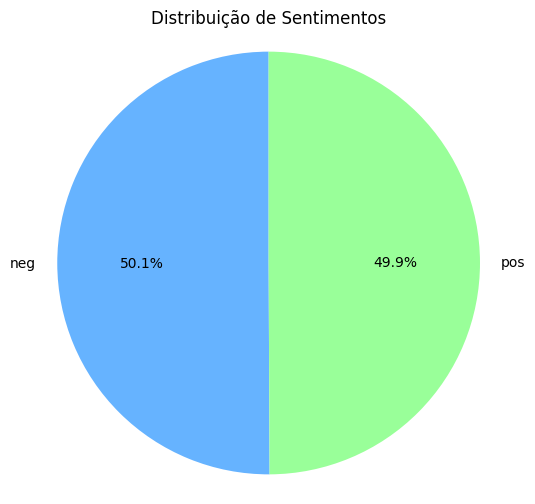

In [ ]:
#Plotando um gráfico de setor para verificarmos a distribuição das classes
sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99','#ffcc99'])
plt.title('Distribuição de Sentimentos')
plt.axis('equal')
plt.show()

Antes de treinar o modelo, é necessário converter o texto em uma forma que o algoritmo de machine learning consiga entender.

**TF-IDF (Term Frequency-Inverse Document Frequency):**
Muito utilizada em tarefas de classificação de texto simples e quando você está lidando com algoritmos tradicionais de machine learning, como SVM, Logistic Regression ou Naive Bayes.

**Word Embeddings (Word2Vec, GloVe):**
Muito utilizada em tarefas mais avançadas de NLP, onde o significado das palavras e a semântica precisam ser capturados. Modelos de embeddings transformam as palavras em vetores numéricos que preservam relações semânticas.

**Modelos Pré-Treinados (BERT, GPT):**
Muito popular em tarefas de NLP complexas, como geração de texto, tradução automática, e análise de sentimentos com precisão mais alta. Modelos como BERT e GPT utilizam deep learning e são capazes de entender o contexto da frase e a relação entre palavras.


In [ ]:
# Criando o vetorizer TF-IDF
tfidf = TfidfVectorizer(max_features=5000)  # Usando o max limitando a 5000 palavras mais frequentes para evitar dimensionalidade excessiva

# Aplicando o TF-IDF na coluna de texto
X = tfidf.fit_transform(df['text_pt'])  # Transformando as avaliações de texto em uma matriz de características numéricas. afinal em modelos trabalhamos com números

O TF-IDF transforma textos em vetores, o que pode tornar a interpretação direta um pouco desafiadora.

In [ ]:
# Obtendo novamente os nomes das palavras
words = tfidf.get_feature_names_out()

# Calculando a média dos valores de aparições de cada palavra
mean_tfidf = X.toarray().mean(axis=0)

# Criando um DataFrame com as palavras e seus valores médios de TF-IDF
tfidf_df = pd.DataFrame(data={'Word': words, 'Mean_TFIDF': mean_tfidf})
tfidf_df = tfidf_df.sort_values(by='Mean_TFIDF', ascending=False)

print(tfidf_df.head(20))

       Word  Mean_TFIDF
1274     de    0.149880
3876    que    0.120847
4747     um    0.086321
2075  filme    0.070152
1876     eu    0.063807
3304    não    0.061988
1612     em    0.057410
4748    uma    0.056533
3436   para    0.054625
1515     do    0.045939
931     com    0.045055
4188     se    0.042169
3386     os    0.040802
961    como    0.040485
2950    mas    0.038694
4898   você    0.036524
1601    ele    0.035221
3674    por    0.033988
3256     no    0.033628
1824   este    0.033130


In [ ]:
# Vamos definir uma lista personalizada de stop words em português
custom_stop_words = ['de', 'a', 'e', 'um', 'que', 'em', 'os', 'para', 'na', 'no',
                     'com', 'é', 'do', 'da', 'dos', 'das', 'se', 'ou', 'mas']

In [ ]:
#  Refazemos o TF-IDF na coluna de texto, removendo as stop words personalizadas
tfidf_2 = TfidfVectorizer(max_features=5000, stop_words=custom_stop_words)  # Usando a lista personalizada
X = tfidf_2.fit_transform(df['text_pt'])

In [ ]:
#Apenas reproduzimos o código rodado anteriormente
words = tfidf_2.get_feature_names_out()
mean_tfidf = X.toarray().mean(axis=0)
tfidf_df = pd.DataFrame(data={'Word': words, 'Mean_TFIDF': mean_tfidf})
tfidf_df = tfidf_df.sort_values(by='Mean_TFIDF', ascending=False)
print(tfidf_df.head(20))

        Word  Mean_TFIDF
2073   filme    0.073735
1873      eu    0.066888
3305     não    0.065278
4748     uma    0.059752
963     como    0.042738
4898    você    0.038399
1599     ele    0.037263
3672     por    0.035886
1821    este    0.034700
3146   muito    0.034307
2905    mais    0.032988
2611    isso    0.032011
2104     foi    0.031413
376       as    0.028571
4276     seu    0.026957
4407     sua    0.025246
2074  filmes    0.024785
1604    eles    0.024683
4469     são    0.024648
4259     ser    0.023555


**Separar os Dados em Conjuntos de Treinamento e Teste**

In [ ]:
label_encoder = LabelEncoder()
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])

In [ ]:
y = df['sentiment']

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% para treino e 20% para teste

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy:.2f}')

# Matriz
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusão:')
print(conf_matrix)

class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print('Relatório de Classificação:')
print(class_report)

Acurácia: 0.88
Matriz de Confusão:
[[4413  625]
 [ 527 4327]]
Relatório de Classificação:
              precision    recall  f1-score   support

         neg       0.89      0.88      0.88      5038
         pos       0.87      0.89      0.88      4854

    accuracy                           0.88      9892
   macro avg       0.88      0.88      0.88      9892
weighted avg       0.88      0.88      0.88      9892



Para conseguirmos visualizar as frases e as classes nós teremos um trabalhinho para juntar as previsões aos indices corretos, assim como nosso vetores das palavras as frases verdadeiras, para isso seguiremos o passo a seguir:

In [ ]:

# 1. Obter os índices do DataFrame original para o conjunto de teste
test_indices = df.index[y_train.shape[0]:]  # Índices que não estão no conjunto de treino

# 2. Recuperar as frases do conjunto de teste usando os índices corretos
test_sentences = df['text_pt'].iloc[test_indices]

# 3. Criar um DataFrame com frases, classes verdadeiras e previsões
results_df = pd.DataFrame({
    'Frase': test_sentences.values,  # Usando as frases corretas como corespondentes
    'Classe Verdadeira': y_test,
    'Previsão': y_pred
})

# 4. Convertendo a coluna das classes novamente para neg e pos
results_df['Classe Verdadeira'] = label_encoder.inverse_transform(results_df['Classe Verdadeira'])
results_df['Previsão'] = label_encoder.inverse_transform(results_df['Previsão'])

print(results_df.head(10))


                                                   Frase Classe Verdadeira  \
12532  Eu espiei este short em um DVD de melhores cur...               pos   
35445  O HOMEM DE DERRETIMENTO ... uma trágica vítima...               neg   
20279  Graças a este filme fúngico eu não quero o meu...               pos   
2969   Como colecionador de memorabilia de filmes, eu...               neg   
45161  O astronauta Steve West Alex Rebar e seus comp...               pos   
42648  Em primeiro lugar, qualquer um que esteja proc...               pos   
17897  "The Incredible Melting Man" é uma produção de...               pos   
41126  Eu vi esse filme em 1959 quando eu tinha 11 an...               pos   
47609  Mating Game é um filme encantador e maravilhos...               pos   
44181  Sempre gostei dessa comédia como uma das pouca...               pos   

      Previsão  
12532      pos  
35445      neg  
20279      neg  
2969       neg  
45161      pos  
42648      pos  
17897      pos  
41126